In [ ]:
from google.colab import files
file_csv = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import os

# 현재 디렉토리에 있는 파일 목록 확인
print(os.listdir())

['.config', '.ipynb_checkpoints', 'sample_submission.csv', 'train.csv', 'test.csv', 'submission.csv', 'sample_data']


##Data fields(데이터 필드 정보)

ID : 집을 구분하는 번호

date : 집을 구매한 날짜

price : 집의 가격(Target variable)

bedrooms : 침실의 수

bathrooms : 화장실의 수

sqft_living : 주거 공간의 평방 피트(면적)

sqft_lot : 부지의 평방 피트(면적)

floors : 집의 층 수
waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)

view : 집이 얼마나 좋아 보이는지의 정도

condition : 집의 전반적인 상태

grade : King County grading 시스템 기준으로 매긴 집의 등급

sqft_above : 지하실을 제외한 평방 피트(면적)

sqft_basement : 지하실의 평방 피트(면적)

yr_built : 지어진 년도

yr_renovated : 집을 재건축한 년도

zipcode : 우편번호

lat : 위도

long : 경도

sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

데이터 읽기

In [250]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"train dim : {train.shape}")
print(f"test dim : {test.shape}")

train dim : (15035, 21)
test dim : (6468, 20)


데이터 정보 확인

In [251]:
test.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
6467,21502,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [252]:
pd.set_option('display.max_columns', None) # columns 수가 많아 한눈에 확인이 안되므로 옵션을 통해 전체 칼럼을 확인해준다.
train.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
15034,15034,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## 결측치 확인
특별히 결측치가 확인되지않음

In [253]:
train.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


## 타겟데이터인 price를 분리

In [254]:
target = train['price']
del train['price']

In [255]:
train_len = len(train)
train = pd.concat((train, test), axis=0)

데이터 중 date데이터가 문자열로 되어있으므로 lambda를 통해 int타입을 변환해준다.

In [256]:
train['date'] = train['date'].apply(lambda x : str(x[:6])).astype(int)

train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,201406,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,201501,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,201502,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,201406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


date feature를 lambda함수를 이용해 숫자로 된 값만 남겨준다.

테스트데이터의 "date" feature도 변환해준다.

In [257]:
test['date'] = test['date'].apply(lambda x : str(x[:6])).astype(int)
test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,201406,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,201501,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,201502,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,201406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


학습에 불필요한 'id' feature는 drop해준다.

In [258]:
del test['id']
sub_id = train['id'][train_len:]
del train['id']


target데이터의 분포시각화

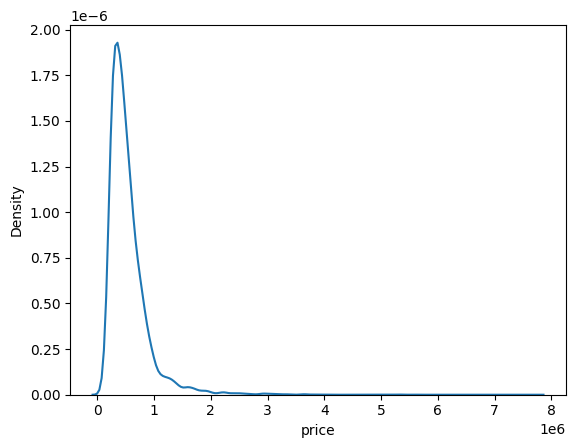

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(target)
plt.show()

target 데이터의 분포가 한쪽으로 치우쳐져 있으므로 정규분포형태로 바꿔주기 위해 로그변환 해준다.

<ipython-input-260-769f6b31f5a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


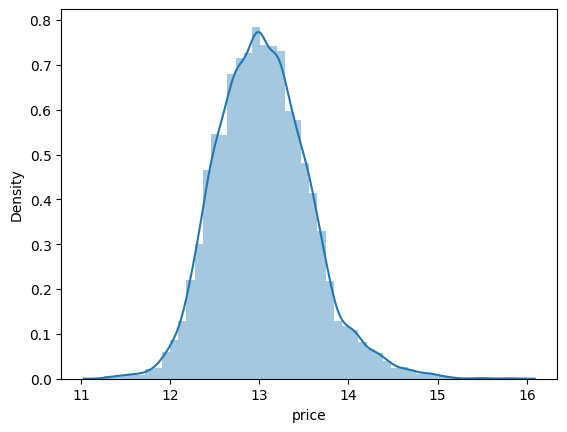

In [260]:
import numpy as np

target = np.log1p(target)
sns.distplot(target)
plt.show()

과정이 전체적으로 잘 이루어졌는지 확인하기 위해 데이터프레임의 정보를 확인해준다.

In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21503 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21503 non-null  int64  
 1   bedrooms       21503 non-null  int64  
 2   bathrooms      21503 non-null  float64
 3   sqft_living    21503 non-null  int64  
 4   sqft_lot       21503 non-null  int64  
 5   floors         21503 non-null  float64
 6   waterfront     21503 non-null  int64  
 7   view           21503 non-null  int64  
 8   condition      21503 non-null  int64  
 9   grade          21503 non-null  int64  
 10  sqft_above     21503 non-null  int64  
 11  sqft_basement  21503 non-null  int64  
 12  yr_built       21503 non-null  int64  
 13  yr_renovated   21503 non-null  int64  
 14  zipcode        21503 non-null  int64  
 15  lat            21503 non-null  float64
 16  long           21503 non-null  float64
 17  sqft_living15  21503 non-null  int64  
 18  sqft_lot15  

모든 feature들에 대한 분포확인

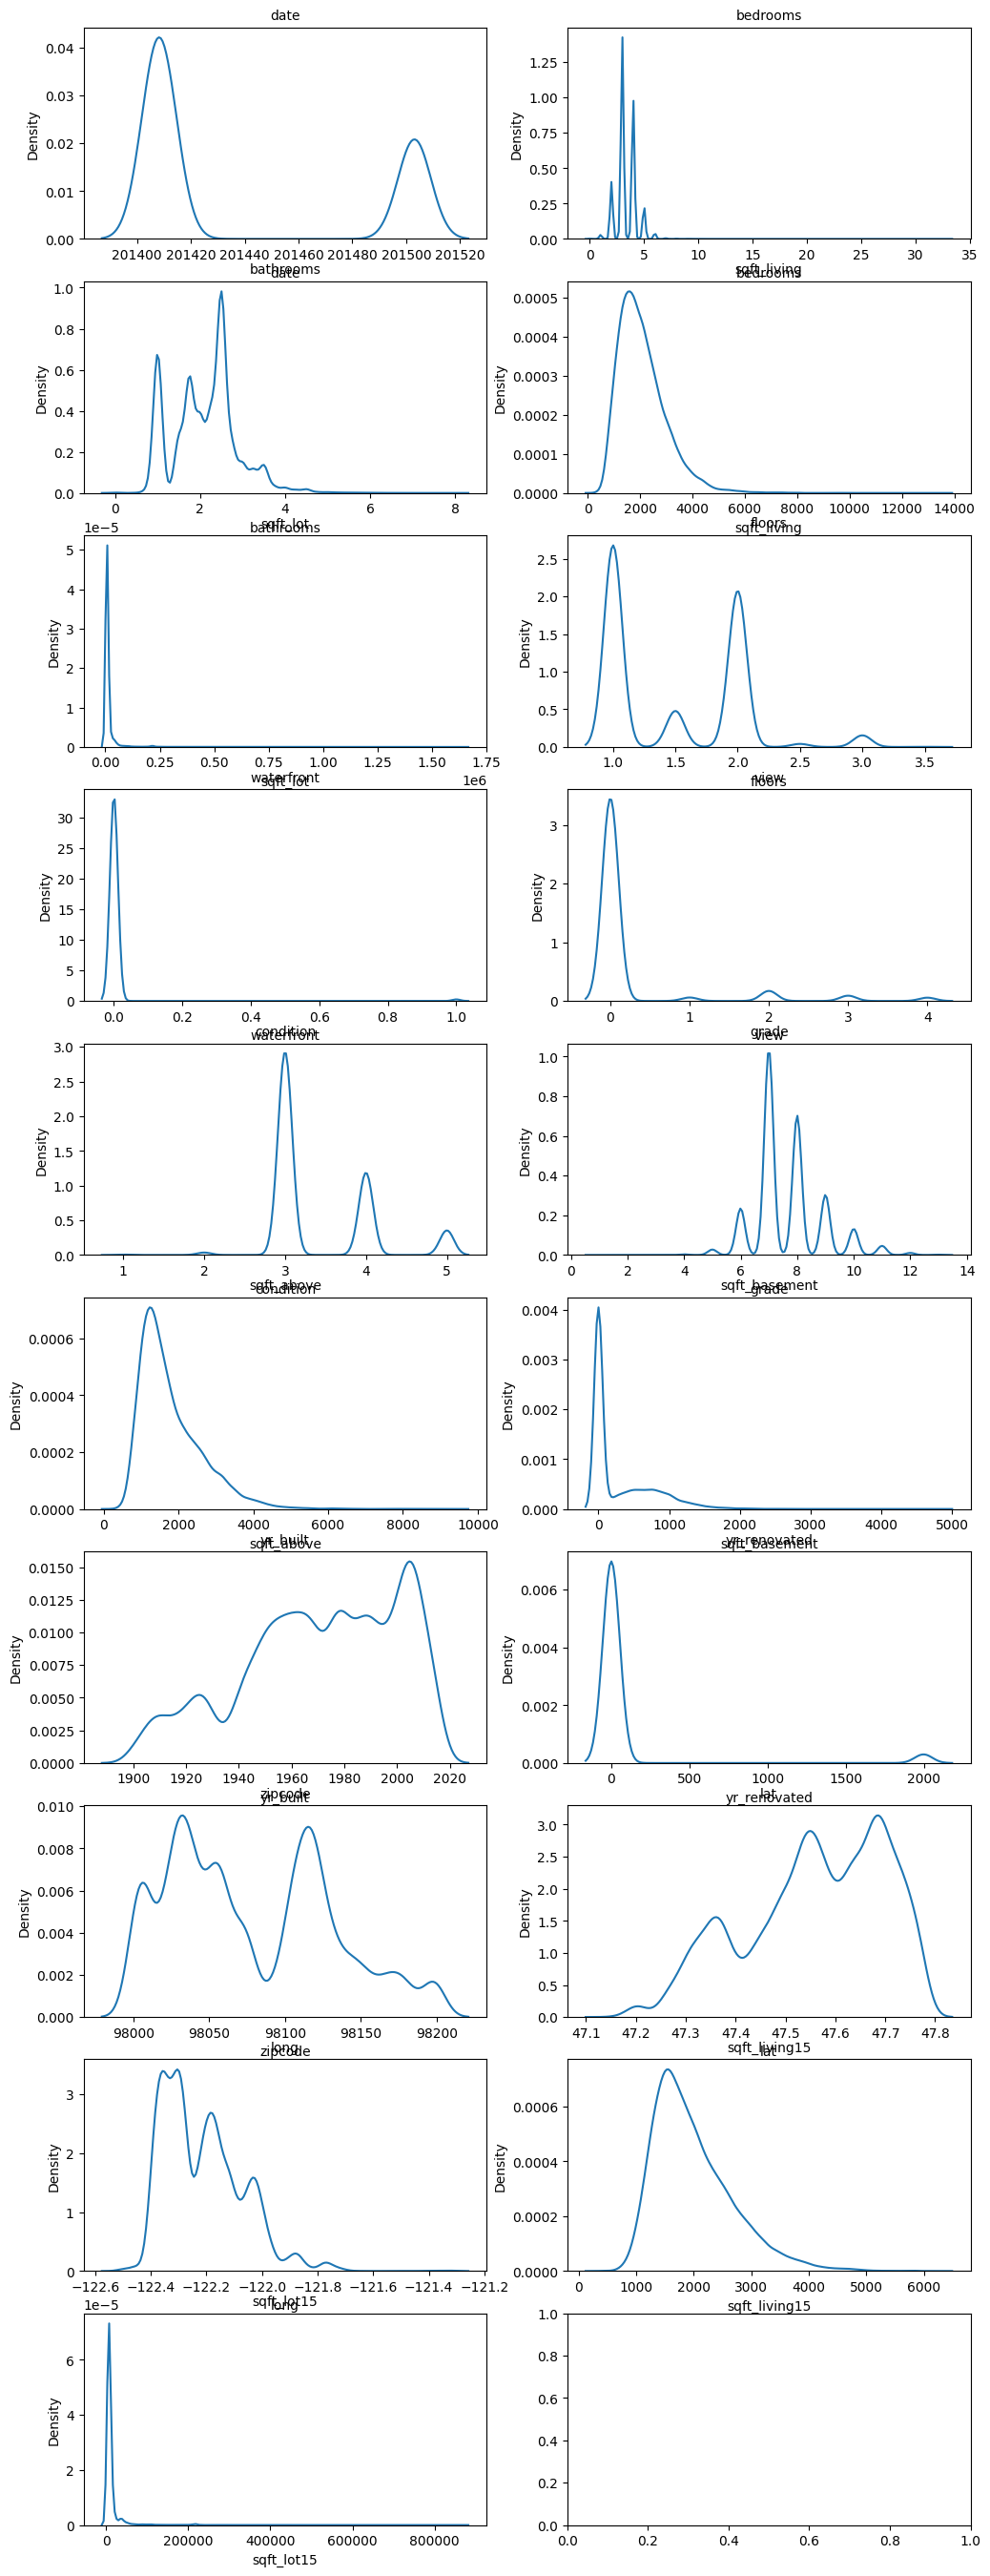

In [262]:
fig, ax = plt.subplots(10, 2, figsize=(12, 34))

count = 0
columns = train.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count+=1
        if count == 19 :
            break

한쪽으로 치우쳐진 형태를 띄는 데이터들은 전부 로그변환을 통해 정규분포 형태로 바꿔준다.

In [264]:
skew_columns = ["sqft_living", "sqft_lot", "sqft_above","sqft_lot15","sqft_basement"]

for i in skew_columns:
    train[i] = np.log1p(train[i])

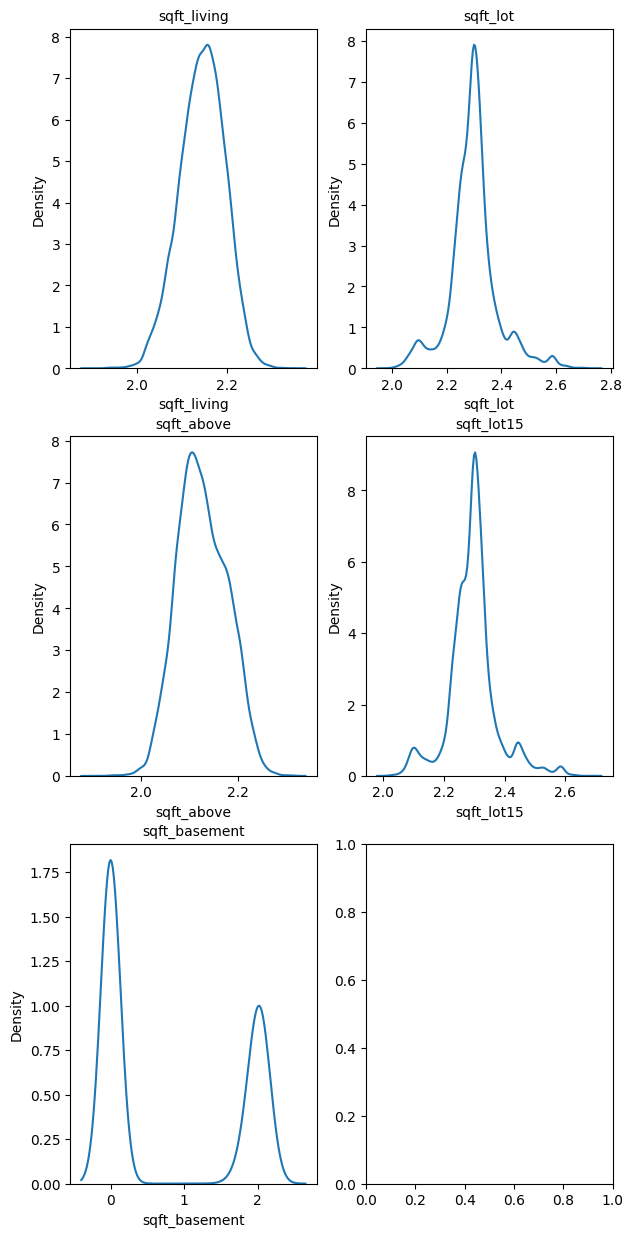

In [265]:
fig, ax = plt.subplots(3, 2, figsize=(7, 15))

count = 0
columns = skew_columns
for row in range(3):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count+=1
        if count == 5 :
            break

## issue: 한쪽으로 치우쳐져 있다고 판단되는 데이터들을 로그변환 해주었으나 몇몇 변수들은 정규분포 형태로 바뀌지 않음

**solution: 데이터의 분포가 연속이 아닌 이산적인 데이터 0 또는 1로 구성되어 있는 데이터들이였던 것이 원인이였음 데이터의 범위를 확인하고 skew_columns를 수정함으로써 로그변환 함으로써 해결함**

분포가 연속적이지 않은 columns

ex) waterfront, floors_view

In [266]:
sub = train.iloc[train_len:, :]
x = train.iloc[:train_len, :]
print(sub.shape)
print(x.shape)

(6468, 19)
(15035, 19)


################################################################################
# 모델 설계
################################################################################

RMSE 함수정의

In [267]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def rmse(y_test, y_pred):
  rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

  return rmse

평가함수 정의

In [268]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=target, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

## 앙상블 모델 사용 (gboost, xgboost, lightgbm)

그리드를 통해 찾은 최적파라미터 적용

In [287]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

gboost = GradientBoostingRegressor(learning_rate= 0.10, max_depth = 5, n_estimators = 300,random_state=2025)
xgboost = XGBRegressor(learning_rate= 0.10, max_depth = 5, n_estimators = 1000, subsample = 0.7,colsample_bytree = 0.5,random_state=2025)
lightgbm = LGBMRegressor(    learning_rate=0.10,
    max_depth=8,
    n_estimators=1000,
    min_child_samples=1,
    min_data_in_leaf=1,
    min_gain_to_split=0,
    num_leaves=64,
    random_state=2025)


models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]



라쏘를 이용해 스태킹 모델사용

In [282]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

stack = StackingRegressor(
    estimators=[
        ('gboost', gboost),
        ('xgboost', xgboost),
        ('lightgbm', lightgbm)
    ],
    final_estimator=Lasso(alpha=0.1),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=1
)

stack.fit(x, target)
y_pred = stack.predict(sub)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is

In [241]:
def AveragingBlending(models, x, y, sub_x):
    for m in models :
        m['model'].fit(x.values, y)

    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

가중치 미세조정

In [288]:
y_pred = AveragingBlending(models, x, target, sub)
y_pred = (
    0.35 * xgboost.predict(sub.values) +
    0.35 * gboost.predict(sub.values) +
    0.30 * lightgbm.predict(sub.values)
)
print(len(y_pred))
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
6468


array([13.20741045, 13.09002334, 14.13979031, ..., 13.0821033 ,
       12.71185154, 12.99104229])

In [ ]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.9037
Model: XGBoost, CV score:0.9080
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.050187


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.052839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.051670


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.050660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.035255


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=1 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
Model: LightGBM, CV score:0.9027


In [289]:
y_pred = np.expm1(y_pred)
y_pred

array([ 544383.16042336,  484087.65674419, 1383033.15861825, ...,
        480268.79776677,  331654.32956125,  438467.07869812])

In [285]:
submission = pd.read_csv("sample_submission.csv")
submission

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000
...,...,...
6463,21498,100000
6464,21499,100000
6465,21500,100000
6466,21501,100000


In [295]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.head()

,id,price
0,15035,5.443832e+05
1,15036,4.840877e+05
2,15037,1.383033e+06
3,15038,2.978949e+05
4,15039,3.332150e+05


## Kaggle Score = 110201.61255

기준점이 11만을 넘음

다른 모델을 설계

## 그리드 서치 (LightGBM)

In [ ]:
def my_GridSearch(model,train,y,param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=3, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    result = pd.DataFrame(params)
    result['Score'] = score

    result['RMSLE'] = np.sqrt(-1 * result['Score'])
    result = result.sort_values('RMSLE')
    return result


하이퍼 파라미터 튜닝 (그리드 서치)

**각 파라미터들이 가지는 의미**

n_estimators:	트리 개수 (많을수록 학습은 안정되지만 느려짐)

max_depth:	각 트리의 최대 깊이 (깊을수록 과적합 위험 ↑)

learning_rate:	학습률 (값이 작을수록 학습은 느리지만 성능은 좋을 수 있음)

In [ ]:
from sklearn.model_selection import GridSearchCV

gboost_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'num_leaves': [31, 50, 100]
}



gboost 그리드서치

In [ ]:
grid_model_gb = my_GridSearch(
    model=gboost,
    train=x,
    y=target,
    param_grid=gboost_params,
    verbose=1,
    n_jobs=-1
)

grid_model_gb.head()

,learning_rate,max_depth,n_estimators,Score,RMSLE
14,0.10,5,300,-0.027689,0.166399
5,0.05,5,300,-0.028038,0.167445
13,0.10,5,200,-0.028130,0.167720
22,0.20,5,200,-0.028410,0.168554
8,0.05,8,300,-0.028471,0.168734


gboost : 0.10	5	300	Score= -0.027689	 RMSLE = 0.166399

In [ ]:
xgb_model_gb = my_GridSearch(
    model=gboost,
    train=x,
    y=target,
    param_grid=gboost_params,
    verbose=1,
    n_jobs=-1
)

xgb_model_gb.columns

Index(['learning_rate', 'max_depth', 'n_estimators', 'Score', 'RMSLE'], dtype='object')

In [ ]:
model = LGBMRegressor(random_state=2025)

In [ ]:
y_pred = np.expm1(y_pred)
y_pred

array([ 497355.59613191,  445746.31850653, 1312231.4942767 , ...,
        463245.21675463,  331691.86305637,  427985.0412839 ])

In [ ]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.tail()

In [ ]:
grid_model.cv_results_

{'mean_fit_time': array([0.78599715, 1.531672  , 1.83795443, 2.23127337, 1.23295813,
        2.25991106, 0.73865561, 1.2340714 , 1.04139605, 2.09721327,
        1.663308  , 2.02467399, 0.73599381, 1.26231232, 0.98916254,
        1.68347192, 1.08231931, 1.74526925, 1.16830997, 2.15494022,
        1.10160656, 2.10908046, 1.22340055, 2.0083262 ]),
 'std_fit_time': array([0.05404254, 0.1941359 , 0.05925139, 0.1711736 , 0.09041944,
        0.18522819, 0.09132029, 0.46742145, 0.15763586, 0.34474924,
        0.08017693, 0.22251985, 0.18655918, 0.23707568, 0.09664446,
        0.14278648, 0.13940662, 0.1176932 , 0.10131544, 0.16858093,
        0.1319071 , 0.17577694, 0.11991432, 0.15024477]),
 'mean_score_time': array([0.04038858, 0.12007904, 0.07229981, 0.10779366, 0.05378199,
        0.12322803, 0.07040954, 0.07850661, 0.06794887, 0.19044094,
        0.08830175, 0.14410181, 0.03873849, 0.08644438, 0.05900059,
        0.13296647, 0.06421185, 0.11995649, 0.06741829, 0.07217669,
        0.049575

In [ ]:
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200},
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200},
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200},
 {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100},
 {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200},
 {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100},
 {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200},
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100},
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20

In [ ]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.09091237, -0.05241831, -0.08151036, -0.04455299, -0.0810789 ,
       -0.04386372, -0.03435587, -0.02995126, -0.03015904, -0.02755586,
       -0.02935961, -0.02696332, -0.03021447, -0.02782631, -0.0277306 ,
       -0.02662889, -0.027322  , -0.02641865, -0.14729492, -0.09107634,
       -0.13906992, -0.08166729, -0.1388615 , -0.0812617 ])

In [ ]:
grid_pram = pd.DataFrame(params)

grid_pram['score'] = score
grid_pram

,learning_rate,max_depth,n_estimators,score
0,0.010,4,100,-0.090912
1,0.010,4,200,-0.052418
2,0.010,6,100,-0.081510
3,0.010,6,200,-0.044553
4,0.010,8,100,-0.081079
5,0.010,8,200,-0.043864
6,0.050,4,100,-0.034356
7,0.050,4,200,-0.029951
8,0.050,6,100,-0.030159
9,0.050,6,200,-0.027556


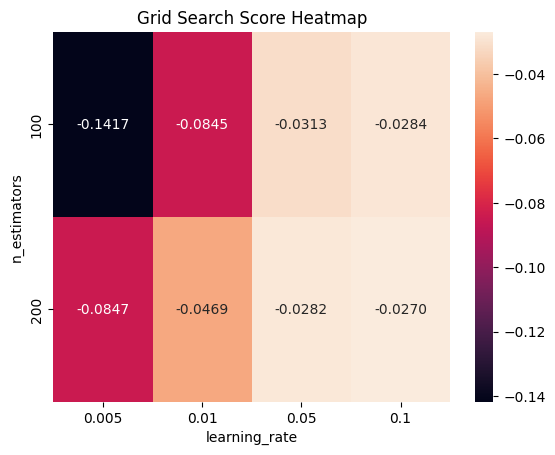

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = grid_pram.pivot_table(values='score', index='n_estimators', columns='learning_rate')
sns.heatmap(pivot, annot=True, fmt=".4f")
plt.title("Grid Search Score Heatmap")
plt.show()


## learning_rate= 0.100,	max_depth = 8,	n_estimators = 200 | Best score = -0.026419

MRMSE 다시 양수로 변환

In [ ]:
grid_pram['score'] = np.sqrt(-1 * grid_pram['score'])
grid_pram

NameError: name 'grid_pram' is not defined

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
test = test['price']
prediction = model.predict(test)
prediction

## Kaggle Score : 121871

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.tail()

,id,price
6463,21498,100000
6464,21499,100000
6465,21500,100000
6466,21501,100000
6467,21502,100000


issue:

In [246]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.tail()

,id,price
6463,21498,241334.256250
6464,21499,403924.134049
6465,21500,477930.810676
6466,21501,320428.513876
6467,21502,432004.082208


In [280]:
result.to_csv('submission.csv', index=False)

In [ ]:
# 현재 디렉토리에 있는 파일 목록 확인
print(os.listdir())

['.config', 'submission.csv', '.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'train.csv', 'sample_data']
